## Decision Tree - Fraud Check

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Fraud_check.csv")

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df["Taxable.Income"] =(df["Taxable.Income"]<=30000).astype('int')

## The above method converts taxable income to categories risky<=30000 i.e. 1 and rest to Good i.e. 0

In [5]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

### Lets create dummy variable for categorical data

In [6]:
dummy_shel = pd.get_dummies(df["Marital.Status"])

In [7]:
df = pd.concat([df.drop("Marital.Status",axis=1),dummy_shel],axis=1)

In [8]:
df = pd.get_dummies(df,drop_first=True)

In [9]:
df.head()

,Taxable.Income,City.Population,Work.Experience,Divorced,Married,Single,Undergrad_YES,Urban_YES
0,0,50047,10,0,0,1,0,1
1,0,134075,18,1,0,0,1,1
2,0,160205,30,0,1,0,0,1
3,0,193264,15,0,0,1,1,1
4,0,27533,28,0,1,0,0,0


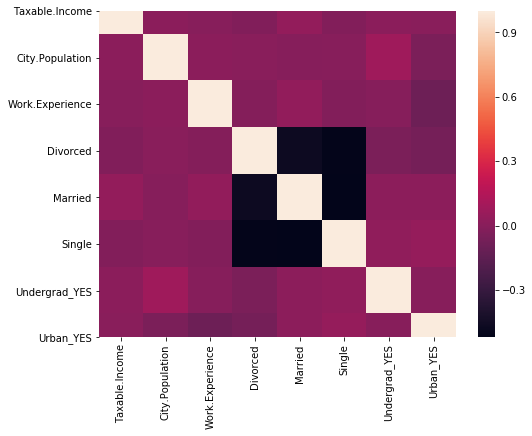

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr())

In [11]:
X = df.drop("Taxable.Income",axis=1)
y = df["Taxable.Income"]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Creating Model

In [13]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
pred = model.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [16]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       144
           1       0.21      0.19      0.20        36

    accuracy                           0.69       180
   macro avg       0.51      0.51      0.51       180
weighted avg       0.68      0.69      0.69       180



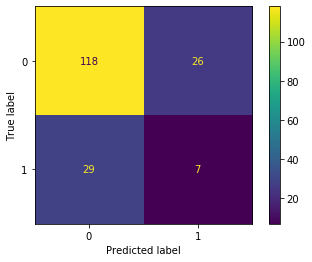

In [17]:
plot_confusion_matrix(model,X_test,y_test)

In [18]:
model2 = DecisionTreeClassifier(criterion='entropy')

In [19]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
pred2 = model2.predict(X_test)

In [21]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       144
           1       0.18      0.14      0.16        36

    accuracy                           0.70       180
   macro avg       0.49      0.49      0.49       180
weighted avg       0.67      0.70      0.69       180



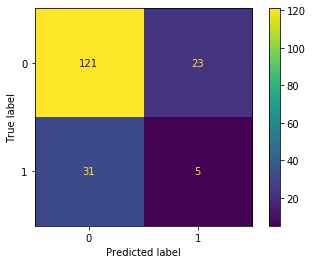

In [22]:
plot_confusion_matrix(model2,X_test,y_test)

### Model1 and Model2 have somewhat same metrics and accuracy is also same.
### Lets create models by changing hyper-parameters and see if we can improve performance

In [31]:
model3 = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=30)
model3.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=30)

In [32]:
pred3 = model3.predict(X_test)

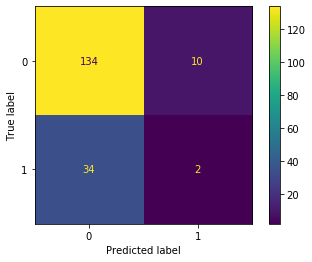

In [33]:
plot_confusion_matrix(model3,X_test,y_test)

In [34]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       144
           1       0.17      0.06      0.08        36

    accuracy                           0.76       180
   macro avg       0.48      0.49      0.47       180
weighted avg       0.67      0.76      0.70       180



### Model3 bit improved in accracy score but other metrics like f1-score for detecting fraud'1' is very low

In [36]:
model3.feature_importances_

array([0.51258285, 0.27708968, 0.        , 0.06984301, 0.03029683,
       0.07258132, 0.03760631])

In [44]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
Married,0.013976
Divorced,0.040515
Undergrad_YES,0.060720
Single,0.062295
Urban_YES,0.079742
Work.Experience,0.190006
City.Population,0.552746


### we see that our model has given high importance to Population feature of dataset

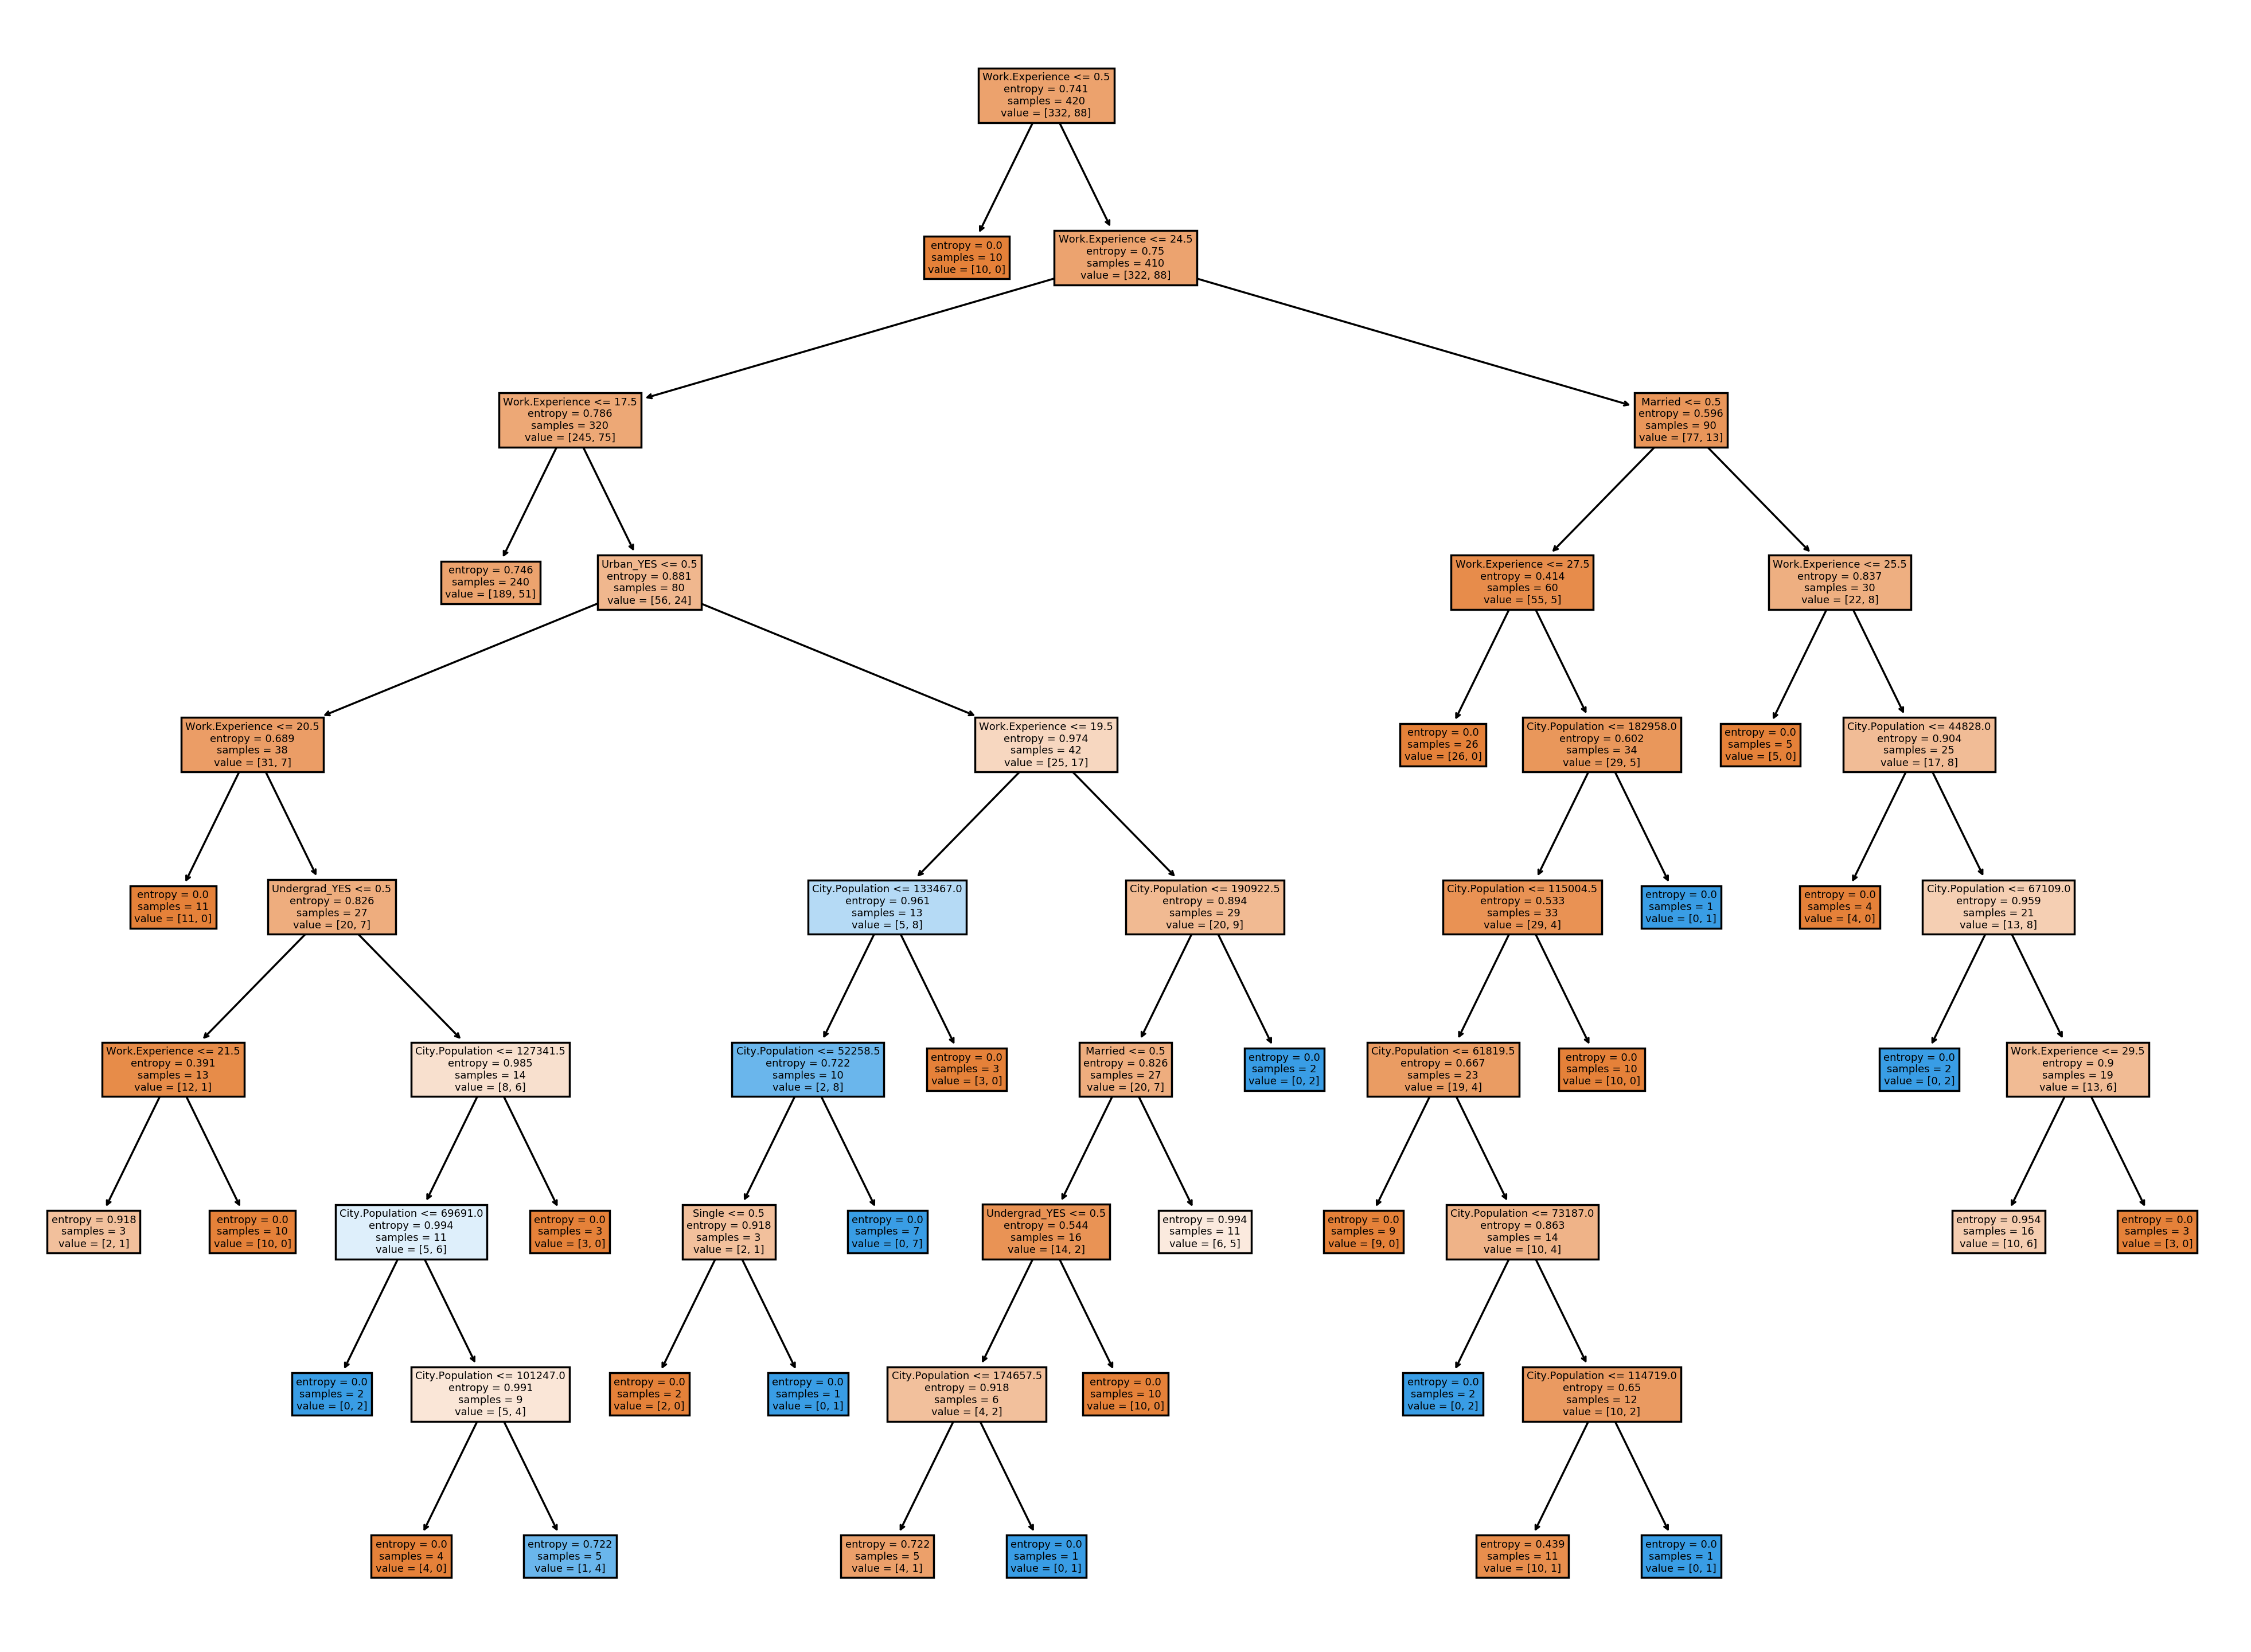

In [48]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15),dpi=250)
plot_tree(model3,filled=True,feature_names=X.columns);